## Data Dictionary
Customer details:

    CustomerID: Unique customer ID
    ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    Age: Age of customer
    TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
    Occupation: Occupation of customer
    Gender: Gender of customer
    NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    PreferredPropertyStar: Preferred hotel property rating by customer
    MaritalStatus: Marital status of customer
    NumberOfTrips: Average number of trips in a year by customer
    Passport: The customer has a passport or not (0: No, 1: Yes)
    OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    Designation: Designation of the customer in the current organization
    MonthlyIncome: Gross monthly income of the customer
    Customer interaction data:

    PitchSatisfactionScore: Sales pitch satisfaction score
    ProductPitched: Product pitched by the salesperson
    NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Problem
    To predict which customer is more likely to purchase the newly introduced travel package
    Which variables are most significant.
    Which segment of customers should be targeted more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\asdf\Documents\D.S\INEURON-PROJECTS\Tour_Package_Project\data\tour_package.csv")

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.shape

(4888, 20)

In [5]:
data=data.drop_duplicates()

In [6]:
data.shape

(4888, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


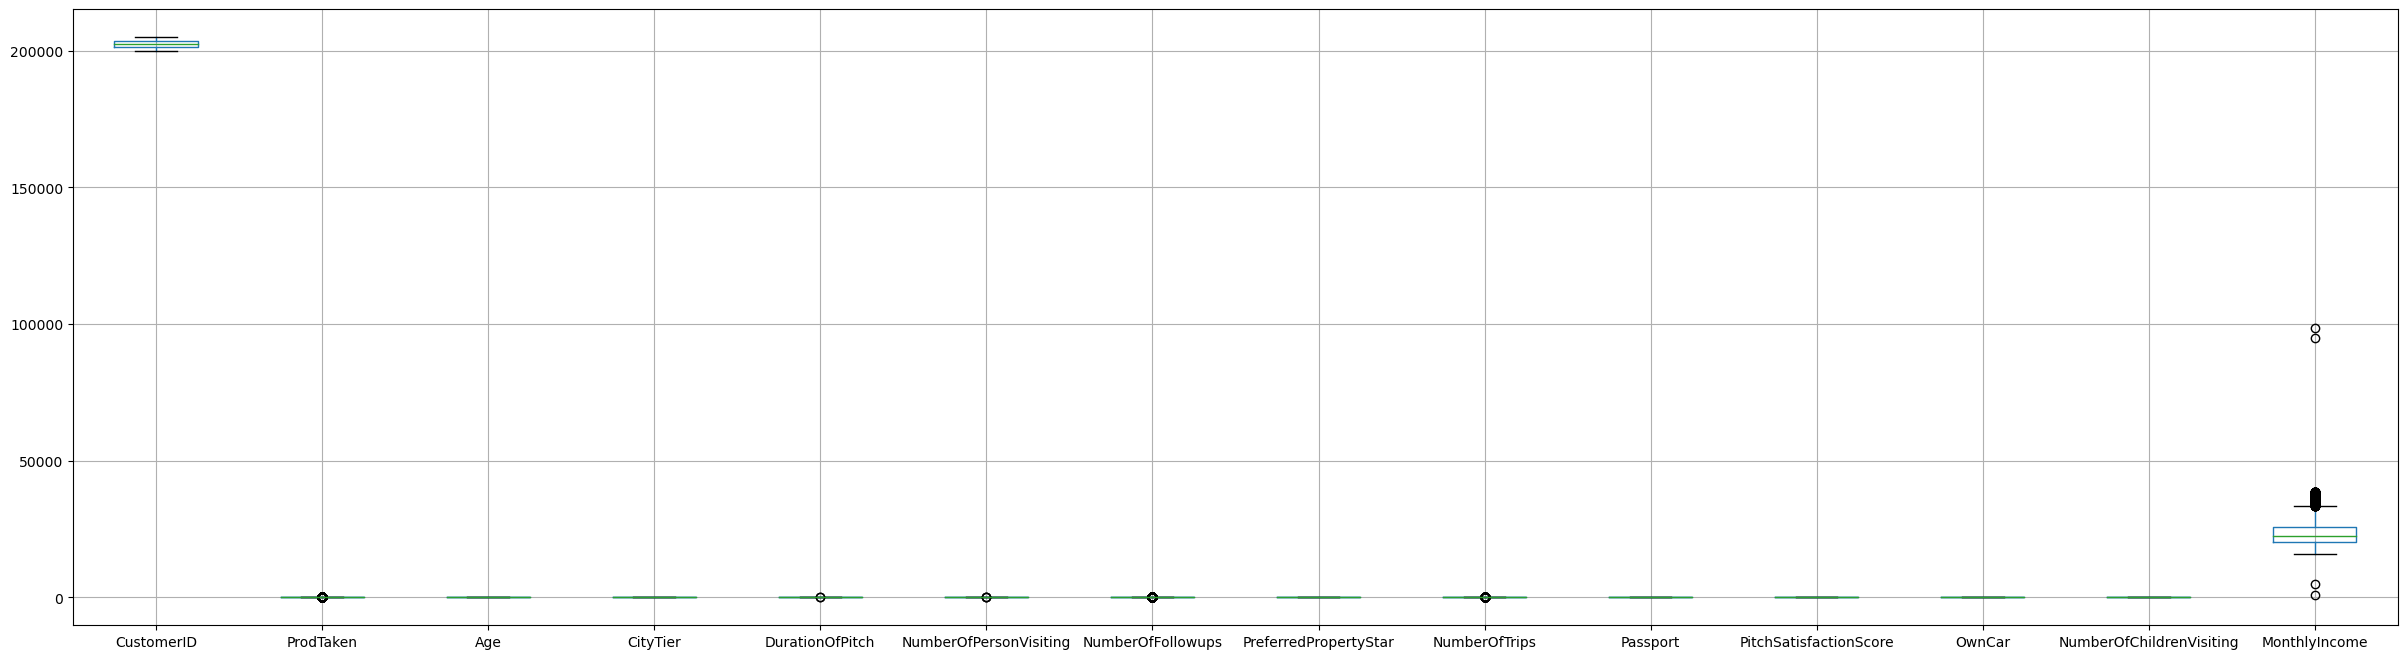

In [9]:
plt.figure(figsize=(30,8))
data.boxplot()
plt.show()

There is only some outliers in the MonthlyIncome data so we need to remove them first 

In [10]:
data["MonthlyIncome"].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [11]:
#let's Explore some data about the outliers first
data[data["MonthlyIncome"]>50000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


As after the find out these details we can clearly see these are outliers and we need to remove them

In [12]:
#we create a function for remove the outliers as there is no much outliers in the data but after that we also need to remove the outliers
def outlier_removal(data,column):
    mean=np.mean(data[column])
    std=np.std(data[column])
    cut_off=std*3
    upper_range,lower_range=mean+cut_off,mean-cut_off
    lower_range_index=list((data[data[column]<lower_range]).index)
    upper_range_index=list((data[data[column]>upper_range]).index)
    outlier_index=lower_range_index+upper_range_index
    data=data.drop(outlier_index,axis=0)
    return data
    

In [13]:
data=outlier_removal(data,"MonthlyIncome")

In [14]:
list(data[data["MonthlyIncome"]<7000].index)

[]

In [15]:
data.shape

(4884, 20)

<Axes: >

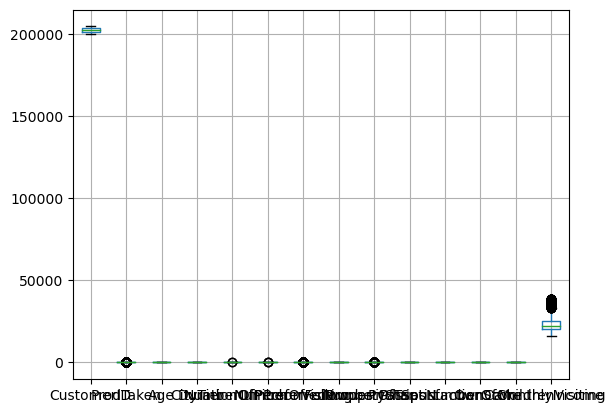

In [16]:
data.boxplot()

#### We will here do some eda manually after that we we handle all missing values and other things using pipeline

In [17]:
df=data.copy()

In [18]:
cat_features=data.select_dtypes(object).columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [19]:
num_features=data.select_dtypes([int,float]).columns
num_features.isnull().sum()
df=df.dropna()

In [20]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [21]:
n_f_df=df.select_dtypes([int,float]).columns
print(n_f_df)

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [22]:
df.shape

(4125, 20)

In [23]:
for i in n_f_df:
    df=outlier_removal(df,i)

In [24]:
df.shape

(4111, 20)

<Axes: >

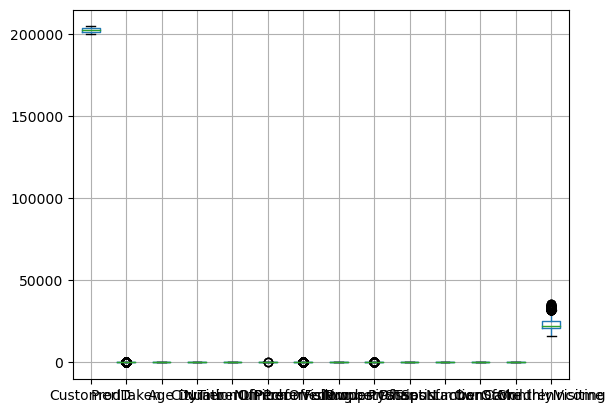

In [25]:
df.boxplot()

In [26]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,202526.258088,0.192897,37.204330,1.665045,15.556799,2.949161,3.739966,3.578935,3.277305,0.295305,3.059353,0.611287,1.223060,23138.988567
std,1409.689019,0.394621,9.164785,0.921198,8.226101,0.719620,1.007638,0.795078,1.778068,0.456235,1.362829,0.487517,0.853282,4276.991171
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16009.000000
25%,201318.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202601.000000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22412.000000
75%,203747.500000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25262.500000
max,204887.000000,1.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,35563.000000


## EDA

In [27]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [28]:
df.shape

(4111, 20)

##### ProdTaken is the Target variable

In [29]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [30]:
num_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [31]:
len(cat_features)

6

In [32]:
len(num_features)

14

In [33]:
for i in cat_features:
    print(f"Column Name: {i}")
    print(df[i].value_counts())
    print("<<"*30)
    print("<"*60)

Column Name: TypeofContact
Self Enquiry       2906
Company Invited    1205
Name: TypeofContact, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Occupation
Salaried          1991
Small Business    1743
Large Business     375
Free Lancer          2
Name: Occupation, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Gender
Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: ProductPitched
Basic           1611
Deluxe          1418
Standard         737
Super Deluxe     250
King              95
Name: ProductPitched, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [34]:
## here unmarried and single are same
## female and fe male are same so we need to handle them firsly

In [35]:
df["Gender"].value_counts()

Male       2453
Female     1503
Fe Male     155
Name: Gender, dtype: int64

In [36]:
df["Gender"]=np.where(df["Gender"]=="Fe Male","Female",df["Gender"])

In [37]:
df["Gender"].value_counts()

Male      2453
Female    1658
Name: Gender, dtype: int64

In [38]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

In [39]:
df["MaritalStatus"]=np.where(df["MaritalStatus"]=="Single","Unmarried",df["MaritalStatus"])

In [40]:
df["MaritalStatus"].value_counts()

Married      1986
Unmarried    1339
Divorced      786
Name: MaritalStatus, dtype: int64

In [41]:
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

In [42]:
#visulization of each cat features

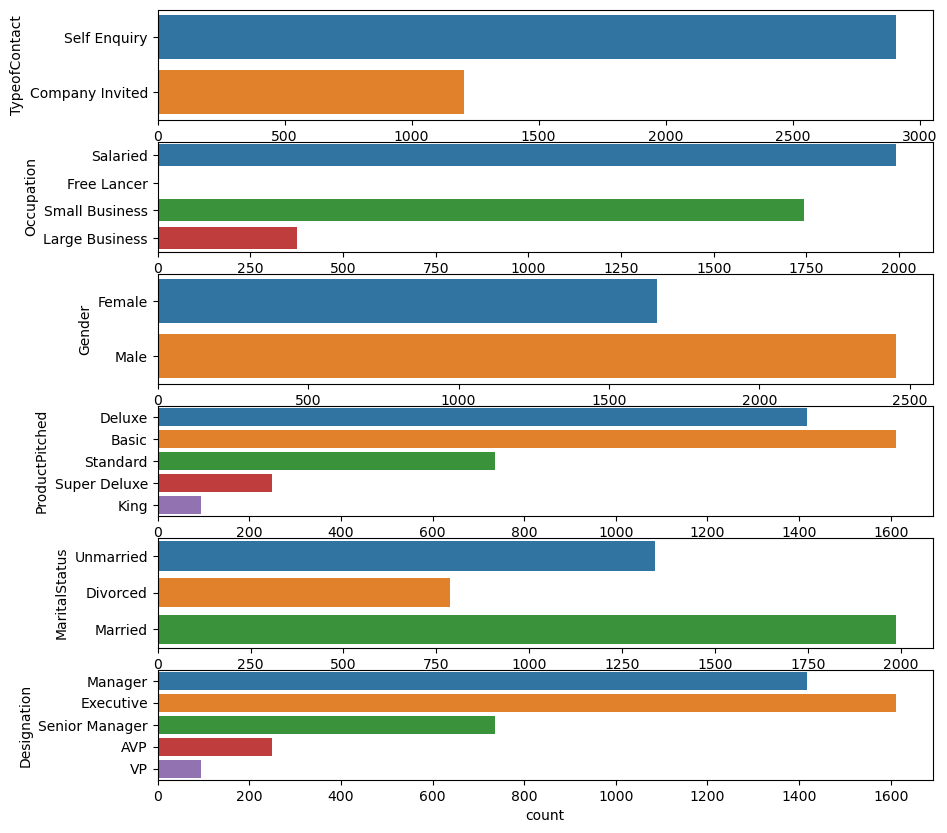

In [43]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i])

### Observation:
1. **Self Enquiry** is has been done by most of the customers
2. Most of the Customers are **Salaried and Small Bussiness**.
3. **Male** customer are **more** than **female** customers
4. From the Productpitched **Basic** has been taken most wheather **King** very less.
5. Most of the Customer are **Married**.
6. Destination of Most of the Customer is **Executive** and **Manager** and Less is **VP**.

In [44]:
for i in range(len(cat_features)):
    print(df.groupby(["ProdTaken",cat_features[i]]).size())
    print(">"*80)

ProdTaken  TypeofContact  
0          Company Invited     932
           Self Enquiry       2386
1          Company Invited     273
           Self Enquiry        520
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Occupation    
0          Large Business     268
           Salaried          1632
           Small Business    1418
1          Free Lancer          2
           Large Business     107
           Salaried           359
           Small Business     325
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Gender
0          Female    1361
           Male      1957
1          Female     297
           Male       496
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  ProductPitched
0          Basic             1128
           Deluxe            1253
           King                88
           Standard           618
   

### Let's See the Distribution with prodtaken

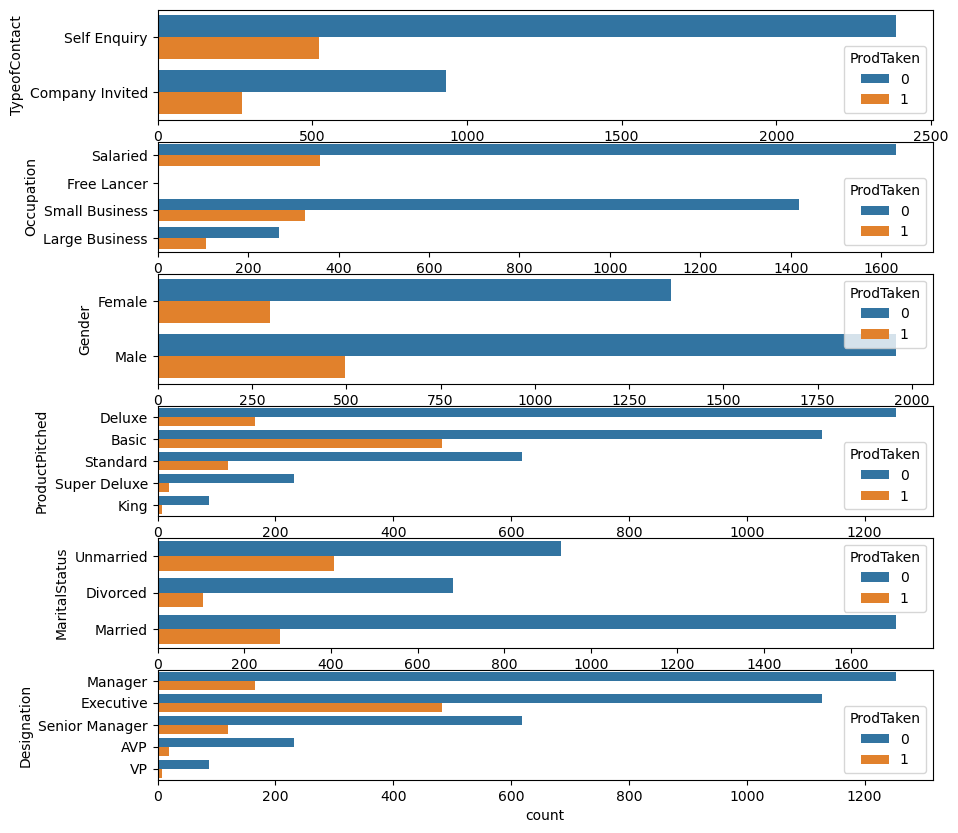

In [45]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(cat_features)):
    sns.countplot(y=df[cat_features[i]],ax=ax[i],hue=df["ProdTaken"])

### Observation:
1. **Basic product Pitch**  Purchase More packages compare with their count.
2.  **Unmarried**  Purchase More packages compare with their count.
3.  **Executive**  Purchase More packages compare with their count.
4. Rest of all are purchasing package in very normal according to their count.


##### Now we have done Data analysis  with categorical Features  Now need to do with Numeric Values...

In [46]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Unmarried,1.0,0,5,1,1.0,Executive,18068.0


####  Except from MonthlyIncome and Age all Feature are also categorical but in Int format so we can extract information in same way

In [47]:
for i in range(len(num_features)):
    print("Column Name:",num_features[i])
    print(df[num_features[i]].value_counts())
    print(">>"*30)
    print(">>"*30)

Column Name: CustomerID
200000    1
203470    1
203361    1
203363    1
203364    1
         ..
201751    1
201753    1
201755    1
201756    1
204887    1
Name: CustomerID, Length: 4111, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: ProdTaken
0    3318
1     793
Name: ProdTaken, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Column Name: Age
36.0    215
35.0    214
30.0    187
31.0    187
34.0    187
33.0    178
32.0    177
37.0    176
38.0    170
29.0    164
39.0    143
41.0    135
28.0    135
27.0    125
40.0    123
42.0    116
43.0    106
46.0    104
45.0     96
26.0     91
44.0     89
50.0     74
47.0     63
25.0     63
51.0     60
49.0     57
48.0     55
52.0     54
55.0     52
53.0     51
54.0     51
24.0     46
23.0     46
22.0     42
59.0     40
21.0     39
20.0     36
56.0     33
58.0     

1. As Customer ID and MonthlyIncome has More variation so we can drop them.
2. Some features like Age and DurationOfPitch has more category, for the observation we can simply categorice  in some range

In [48]:
df.groupby("ProdTaken")["MonthlyIncome"].sum()

ProdTaken
0    77746588.0
1    17377794.0
Name: MonthlyIncome, dtype: float64

In [49]:
df=df.drop(["CustomerID","MonthlyIncome"],axis=1)

In [50]:
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager


In [51]:
num_features=df.select_dtypes([float,int]).columns
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

###### firstly handle the Age for Visulization

In [53]:
check_df = pd.DataFrame({'number': np.random.randint(1, 100, 10)})
check_df['bins'] = pd.cut(x=check_df['number'], bins=[1, 20, 40, 60, 80, 100],
                    labels=['1 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100'])

In [54]:
check_df

,number,bins
0,23,21 to 40
1,22,21 to 40
2,46,41 to 60
3,55,41 to 60
4,20,1 to 20
5,66,61 to 80
6,26,21 to 40
7,75,61 to 80
8,67,61 to 80
9,19,1 to 20
